Browsing AGN and galaxy light cone
--------------------------------------




In [2]:
import time 
t0 = time.time()
import numpy as n
import os, sys, glob

import astropy.io.fits as fits
#from astropy_healpix import healpy 
import healpy
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as p
%matplotlib inline  

from scipy.interpolate import interp1d


Retrieve a set of pixels
=========================

In [47]:
NSIDE=8
#?healpy.pix2ang
hp16 =n.arange(healpy.nside2npix(NSIDE))
HEALPIX_16_ra, HEALPIX_16_dec = healpy.pix2ang(NSIDE, hp16,lonlat=True, nest=True)
#print(HEALPIX_16)
#p.figure(1)
#p.scatter(HEALPIX_16_ra, HEALPIX_16_dec, c=hp16)
#p.figure(2)
#HEALPIX_ID_test = healpy.ang2pix(16,  -HEALPIX_16_dec*n.pi/180. + n.pi/2., HEALPIX_16_ra*n.pi/180. ) 
#p.scatter(HEALPIX_16_ra, HEALPIX_16_dec, c=HEALPIX_ID_test)
# select between 10h-14h in ra, erosita DE in the NGC, dec=0.

hpx_ids_selection = (abs(HEALPIX_16_dec)<5) & (HEALPIX_16_ra>150) & (HEALPIX_16_ra<210) 
print('N pixels selected = ',len(hp16[hpx_ids_selection]), ', area per pixel =',healpy.nside2pixarea(NSIDE, degrees=True), 'deg2')
area_per_pixel = healpy.nside2pixarea(NSIDE, degrees=True) # deg2

N pixels selected =  16 , area per pixel = 53.714793293514674 deg2


In [48]:
dir_2_eRO_simulations = "/home/idies/workspace/erosim/"
path_2_GALAXY_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_GALAXY_all', str(HEALPIX_id).zfill(6)+'.fit')
path_2_AGN_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_AGN_all', str(HEALPIX_id).zfill(6)+'.fit')
path_2_AGN_MAG_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_AGN-MAG_all', str(HEALPIX_id).zfill(6)+'.fit')
path_2_AGN_SIMPUT_catalog = lambda HEALPIX_id : os.path.join(dir_2_eRO_simulations, 'cat_AGN_SIMPUT', str(HEALPIX_id).zfill(6)+'.fit')


In [49]:
def retrieve_data(HEALPIX_id):
    hd_GAL = fits.open(path_2_GALAXY_catalog(HEALPIX_id))
    hd_AGN = fits.open(path_2_AGN_catalog(HEALPIX_id))
    return hd_GAL, hd_AGN


In [50]:
hd_GAL, hd_AGN = {}, {}
print(hp16[hpx_ids_selection])
for id_0 in hp16[hpx_ids_selection]:
    hd_GAL[id_0], hd_AGN[id_0] = retrieve_data(id_0)

[399 403 406 408 409 410 411 412 419 420 421 422 423 425 428 432]


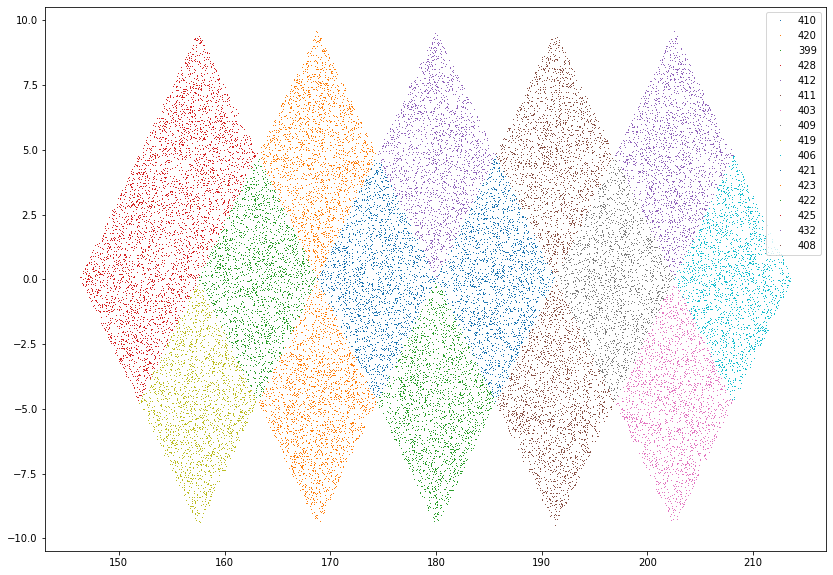

In [51]:
id_s = hp16[hpx_ids_selection]
n.random.shuffle(id_s)
p.figure(1, (14,10))
for id_0 in id_s:
    N_objects=len(hd_AGN[id_0][1].data['RA'])
    rd_downsample = ( n.random.random(N_objects) < 2000./N_objects )
    p.plot(hd_AGN[id_0][1].data['RA'][rd_downsample], 
           hd_AGN[id_0][1].data['DEC'][rd_downsample],
           marker=',', linestyle='None', rasterized=True, label=str(id_0))

p.legend(loc=0)
#p.xlim((140, 220))

column content
===========

In [52]:
hd_GAL[id_0][1].data.columns,hd_AGN[id_0][1].data.columns

(ColDefs(
     name = 'RA'; format = 'E'
     name = 'DEC'; format = 'E'
     name = 'g_lat'; format = 'E'
     name = 'g_lon'; format = 'E'
     name = 'ecl_lat'; format = 'E'
     name = 'ecl_lon'; format = 'E'
     name = 'redshift_R'; format = 'E'
     name = 'redshift_S'; format = 'E'
     name = 'dL'; format = 'E'
     name = 'nH'; format = 'E'
     name = 'ebv'; format = 'E'
     name = 'galaxy_SMHMR_mass'; format = 'E'
     name = 'galaxy_star_formation_rate'; format = 'E'
     name = 'galaxy_is_quiescent'; format = 'E'
     name = 'galaxy_LX_hard'; format = 'E'
     name = 'galaxy_mag_abs_r'; format = 'E'
     name = 'galaxy_mag_r'; format = 'E'
     name = 'galaxy_UM_A_UV'; format = 'E'
     name = 'galaxy_UM_True_SM'; format = 'E'
     name = 'galaxy_UM_ICL_mass'; format = 'E'
     name = 'galaxy_UM_True_SFR'; format = 'E'
     name = 'galaxy_UM_Obs_UV'; format = 'E'
     name = 'HALO_id'; format = 'K'
     name = 'HALO_pid'; format = 'K'
     name = 'HALO_Mvir'; format = 'E

Redshift distribution
=================

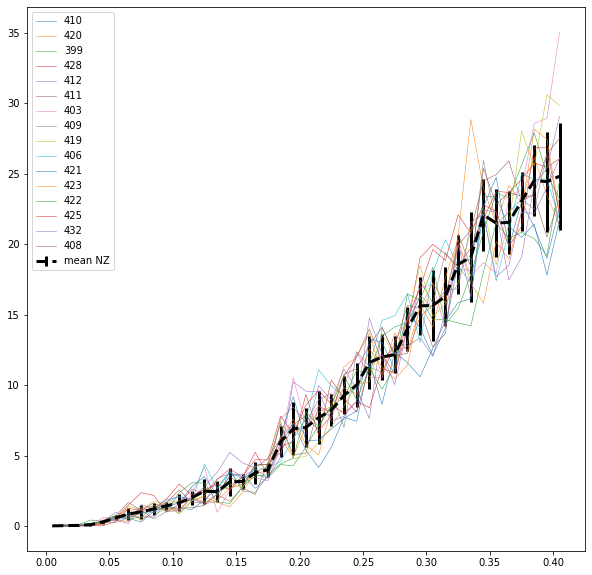

In [53]:
DZ=0.01
z_bins = n.arange(0,0.42, DZ)
z_bins_middle = z_bins[:-1]+DZ/2.
p.figure(2, (10, 10))
NZ = n.zeros((len(id_s), len(z_bins_middle)))
for ii, id_0 in enumerate(id_s):
    NZ[ii] = n.histogram(hd_AGN[id_0][1].data['redshift_R'], bins=z_bins)[0]
    p.plot(z_bins_middle,  NZ[ii]/area_per_pixel, label=id_0, lw=0.5)

p.errorbar(z_bins_middle,  n.mean(NZ, axis=0)/area_per_pixel, yerr=n.std(NZ, axis=0)/area_per_pixel, label='mean NZ', c='k', ls='dashed', lw=3)
#p.plot(z_bins_middle,  , label='median NZ', c='r', ls='dashed', lw=3)
    
p.legend(loc=0)


Log N log S
==========

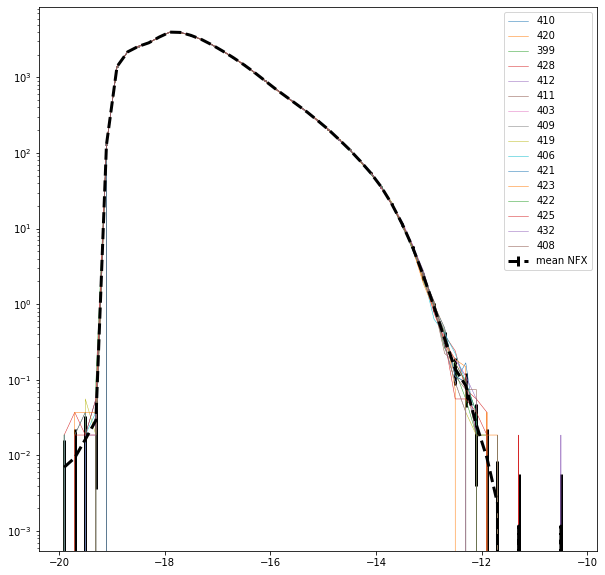

In [55]:
DF=0.2
f_bins_log = n.arange(-20, -10, DF)
f_bins = 10**f_bins_log
f_bins_middle = f_bins_log[:-1]+DF/2.
p.figure(2, (10, 10))
NFX = n.zeros((len(id_s), len(f_bins_middle)))
for ii, id_0 in enumerate(id_s):
    NFX[ii] = n.histogram(hd_AGN[id_0][1].data['FX_soft'], bins=f_bins)[0]
    p.plot(f_bins_middle,  NFX[ii]/area_per_pixel, label=id_0, lw=0.5)

p.errorbar(f_bins_middle,  n.mean(NFX, axis=0)/area_per_pixel, yerr=n.std(NFX, axis=0)/area_per_pixel, label='mean NFX', c='k', ls='dashed', lw=3)
#p.plot(z_bins_middle,  , label='median NZ', c='r', ls='dashed', lw=3)
p.yscale('log')    
p.legend(loc=0)
